In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


### Synthetic data

In [2]:
centers= [[1,1], [-1,-1], [1,-1]]
X, y = make_blobs(n_samples = 600, centers = centers, cluster_std = 0.5, random_state=42)

In [3]:
X.shape, np.unique(y), np.bincount(y)

((600, 2), array([0, 1, 2]), array([200, 200, 200]))

### Idea clusters

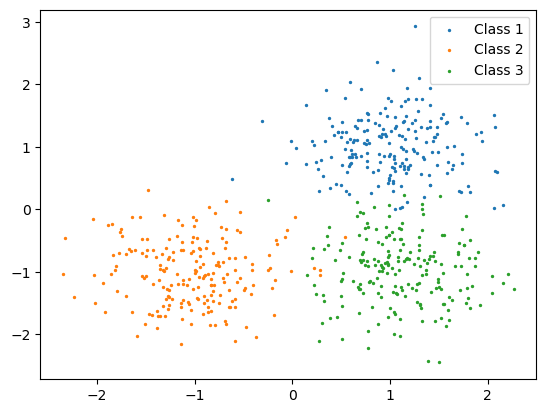

In [4]:
plt.scatter(X[y==0,0], X[y==0, 1], s=2)
plt.scatter(X[y==1,0], X[y==1, 1], s=2)
plt.scatter(X[y==2,0], X[y==2, 1], s=2)

plt.legend(["Class 1", "Class 2", "Class 3"])

### Model

In [5]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [6]:
class MeanShift:
    def __init__(self, X ,y ,window=1, adj=0.1):
        self.window = window
        self.X = X
        self.y = y
    def fit(self):
        clusters = {}
        for i in range(len(self.X)):
            clusters[i] = X[i]
            
        for k in range(20):
            new_centroid = []
            for i in clusters.values():
                window_features = []
                current_centroid = i
                for j in self.X:
                    if distance(current_centroid, j) <= self.window:
                        window_features.append(j)
                avg = tuple(np.mean(np.array(window_features), axis=0))
                new_centroid.append(avg)
            new_centroid = sorted(set(new_centroid))
            
            clusters = {}
            for i in range(len(new_centroid)):
                clusters[i] = new_centroid[i]
            print(len(clusters))
        return np.array(new_centroid)


        

In [7]:
model = MeanShift(X,y)

In [8]:
centroids = model.fit()

586
501
352
198
93
51
35
28
22
18
15
14
11
10
8
8
6
6
6
5


In [9]:
centroids

array([[-1.05172105, -1.05090803],
       [-1.04239152, -1.06573043],
       [ 1.00066169,  0.95356966],
       [ 1.00151327,  0.94317727],
       [ 1.06769119, -0.89956298]])

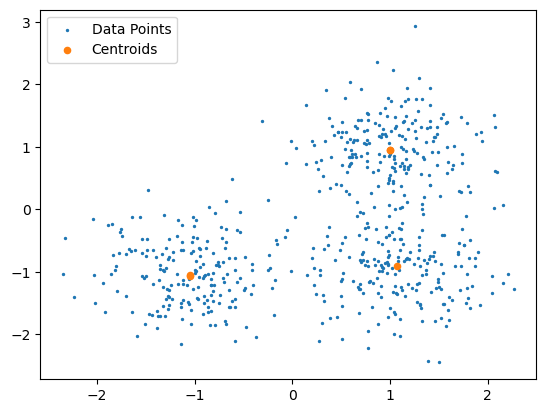

In [10]:
plt.scatter(X[:,0], X[:, 1], s=2)
plt.scatter(centroids[:,0], centroids[:,1], s=20)

plt.legend(["Data Points", "Centroids"])